In [20]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  #Z=x-u/Sd


In [21]:
# data import
data = pd.read_csv('/content/Churn_Modelling.csv')
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')

The data has 10000 rows and 14 columns.


In [22]:
# Data sample
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# Data type of each column
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [24]:
# Missing value check
#data.isnull().sum()                  # Count of missing value in each attribute
round(data.isnull().mean()*100, 2)   # Percentage of missing value in each attribute

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [53]:
# data sample
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [26]:
# Split the data into independent and dependent
x = data.iloc[:, 3:-1] # independent
y = data.iloc[:, 13]   #dependent

In [27]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [28]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [52]:
# One hot encoding
x = pd.get_dummies(x, drop_first=True, dtype='int')
x.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


In [30]:

# train test split of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
# Data scaling - normalization
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [32]:
x_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [33]:
x_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])


# Build ANN Architecture

    # 1. Initalize model as sequential
    # 2. add layers (input, hidden, output) along with activation functions, weight intializer
    # 3. metrics, loss, optimizer

In [34]:
# Importing required libraries for ANN
import keras
from keras.models import Sequential #ANN
from keras.layers import Dense  #Dense=input layer + hidden layer + output layer

In [35]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [36]:
8*2/3

5.333333333333333

In [37]:
# Building the ANN Acrchitecture

# --- FEED FORWARD MECHANISM ---- # (Forward Propagation)

# intialize the model
model = Sequential()

# Building the layers
# input layer
model.add(Dense(units=11, kernel_initializer='he_uniform', input_dim=11))  # unit: no.of.neurons 11*11+11 = 132

# first hidden layer
model.add(Dense(units=8, activation='relu', kernel_initializer='he_uniform'))  11*8+8 = 96

# second hidden layer
model.add(Dense(units=6, activation='relu', kernel_initializer='he_uniform'))   8*6+6=54

# output layer
model.add(Dense(units=1, activation='sigmoid'))   # sigmoid - classification problem  6*1+1=7


# --- BACK PROPAGATION ---- #
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**he_uniform** : This is one of the weight initialization techniques designed to improve the training of deep neural networks, particularly for layers that use the ReLU activation function.

Loss Functions for Classification
**a. Categorical Crossentropy**
Used for: Multi-class classification problems (more than 2 classes).

**Sparse Categorical Crossentropy**
Used for: Multi-class classification problems with integer-encoded labels (not one-hot encoded).
Description: Similar to categorical crossentropy but the labels are given as integer class labels rather

Mean Squared Error (MSE)
Used for: Regression problems (predicting continuous values).

In [47]:
# ANN Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [39]:
# loss/cost = Y_Actual - Y_Predict
1 - 0.25

0.75

In [48]:
# Fitting the data inside the network architecture
model_history = model.fit(x_train_scaled, y_train, validation_split=0.3, batch_size=10, epochs=20)

Epoch 1/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8278 - loss: 0.3780 - val_accuracy: 0.8167 - val_loss: 0.3960
Epoch 2/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8365 - loss: 0.3718 - val_accuracy: 0.8304 - val_loss: 0.3907
Epoch 3/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8542 - loss: 0.3527 - val_accuracy: 0.8333 - val_loss: 0.3874
Epoch 4/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8542 - loss: 0.3510 - val_accuracy: 0.8333 - val_loss: 0.3804
Epoch 5/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8542 - loss: 0.3497 - val_accuracy: 0.8325 - val_loss: 0.3787
Epoch 6/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8522 - loss: 0.3473 - val_accuracy: 0.8296 - val_loss: 0.3774
Epoch 7/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8508 - loss: 0.3524 - val_accuracy: 0.8338 - val_loss: 0.3734
Epoch 8/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8565 - loss: 0.3464 - val_accuracy: 0.

Batch Size = 10

This means the model will process 10 samples at a time before updating its weights.

After processing each batch:
It calculates the loss and gradients for those 10 samples.
It updates the weights once.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


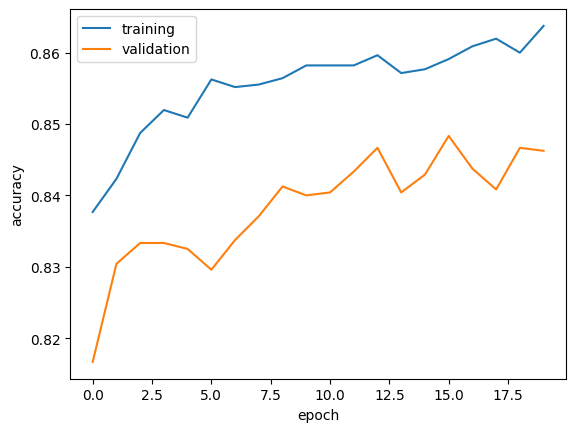

In [49]:
# Plot the accuracy vs val_accuracy
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.show()

**Training Accuracy (accuracy)**
Definition:
The accuracy of the model on the training data after each epoch.

Purpose:
It shows how well the model is learning from the data it has already seen.

Interpretation:
High training accuracy → Model is fitting well to the training data.
If training accuracy keeps increasing while validation accuracy does not, it may indicate overfitting.

**Validation Accuracy (val_accuracy)**

Definition:
The accuracy of the model on unseen validation data after each epoch.

Purpose:
It measures how well the model generalizes to data it has never seen before.

Why It Matters:

Helps detect overfitting or underfitting.

A reliable indicator of how the model will perform on real-world test data.

Training Loss (loss)
Definition:
The error calculated on the training data after each epoch using the chosen loss function (e.g., categorical crossentropy, mean squared error).

Purpose:

Tells how well the model is fitting the training data.
A lower training loss means the model is learning to minimize mistakes on the data it has already seen.

Ideal Behavior:
Training loss should decrease steadily over epochs.

Validation Loss (val_loss)
Definition:
The error calculated on the validation data (unseen data) after each epoch.

Purpose:

Measures how well the model generalizes to unseen data.

Helps detect overfitting or underfitting early during training.

Ideal Behavior:

Validation loss should decrease along with training loss, at least initially.
If validation loss starts increasing while training loss keeps decreasing, the model is overfitting.

In [51]:
# Predict probabilities
y_pred_prob = model.predict(x_test_scaled)

# Convert probabilities to 0 or 1 (binary classification)
y_pred = (y_pred_prob > 0.5).astype(int)

# Show first 10 predictions
print("Predicted Values (0 = No Churn, 1 = Churn):")
print(y_pred[:10])


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted Values (0 = No Churn, 1 = Churn):
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8385

Confusion Matrix:
[[1540   67]
 [ 256  137]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.67      0.35      0.46       393

    accuracy                           0.84      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.82      0.84      0.82      2000



In [44]:
new_customer = np.array([[619, 42, 2, 0.0, 1, 1, 1, 101348.88, 1, 1, 50000]])


In [54]:
# Example new customer data
# Format must match the 11 input features
new_customer = np.array([[619, 42, 2, 0.0, 1, 1, 1, 101348.88, 1, 1, 50000]])

# Scale using the same scaler
new_customer_scaled = scale.transform(new_customer)

# Predict
prediction = model.predict(new_customer_scaled)

# Convert probability to binary output
if prediction > 0.5:
    print("Prediction: Customer WILL churn (1)")
else:
    print("Prediction: Customer will NOT churn (0)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: Customer will NOT churn (0)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
